# Clean and Analyze Employee Exit Surveys
We'll work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

DETE Data Dictionary: 
* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

TAFE Data Dictionary:
* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


In this project, our stakeholders want to know the following:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Conclusions:
1. On average, established and veteran employees tend to resign due to job dissatisfaction more than New and Experiences employees. This could be due to the fact that they have other options unlike New employees who may not have as many opportunities to change their job. 
2. On averge, older employees tend to resign due to job dissatisfaction more than young employees. This could be due to the fact that they have more experience and thus more options unlike New employees who may not have as many opportunities to change their job because they're young and without much experience.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [53]:
# Exploratory analysis on the DETE Dataset
print(dete_survey.shape)
print('\n')
dete_survey.head()

(822, 56)




,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [54]:
# Exploratory analysis on the TAFE Dataset
print(tafe_survey.shape)
print('\n')
tafe_survey.head()

(702, 72)




,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


From exploring the data above, we can see that:
* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN (Fixed by reading dataset again and assigning na_values variable to 'Not Stated').
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [55]:
# Drop some columns from each DataFrame that we won't use in our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

Since we aim to combine both data sets, we're going to clean the column names so they match and eliminate redundant and duplicate data. 
We also make everything lower case, eliminate trailing whitespaces and then replace any space with ('_')

In [56]:
# Rename the Tafe columns to match the Dete columns 
rename_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 
               'Reason for ceasing employment': 'separationtype', 
               'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
               'Employment Type. Employment Type': 'employment_status', 
               'Classification. Classification': 'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(rename_dict, axis = 'columns', inplace = True)

# Clean column names 
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.lower()
                               .str.strip()
                               .str.replace('.', '')
                               .str.replace('- ', '')
                               .str.replace('/', '')
                               .str.replace(' ', '_')
                              )

tafe_survey_updated.columns = (tafe_survey_updated.columns
                               .str.lower()
                               .str.strip()
                               .str.replace('.', '')
                               .str.replace('- ', '')
                               .str.replace('/', '')
                               .str.replace(')', '')
                               .str.replace('(', '')
                               .str.replace(' ', '_')
                              )

Now since our column names are clean, we can begin by filtering the data. Since we're wondering about people who resigned, we can filter the data using boolean indexing and leave only rows where the sepration reason is resignation. 

In [57]:
# Filter the data so only rows with Resignation as the reason for leaving stay
dete_res = ['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate']

dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].isin(dete_res)].copy()

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy() # Copy to avoid warning

Now we explore the cease_date and dete_start_date to see if they make sense. Cease_date can't be after the current year and start date can't be before the 1940's. That's because cease date is the date of exit and can't be in the future and start date can't be in the 1940s as many teachers begin in their 20s.

In [58]:
# Remove year and assign it to a new column
dete_resignations['cease_year'] = pd.to_datetime(dete_resignations['cease_date']).dt.year
tafe_resignations['cease_year'] = tafe_resignations['cease_date']

# Since one value from the dete cease year is 2006 but no value matches that in tafe cease year,
# We should remove the 2006 row
dete_resignations = dete_resignations.drop(762)

Tafe dataframe has 'institute_service' column which shows how long the person was employed for. Now we have to create the same column in the dete dataframe and clean the tafe column to only contain integers or floats instead of strings.

In [59]:
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']

Now we're going to create a new column to show which employees left because of job Dissatisfaction.
The values of the new column will be True, False or NaN. 
We're going to use the following columns to indicate if the reasons below caused an employee to resign, we'll mark them as dissatisfied in a new column.

## tafe_survey_updated:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

## detesurveyupdated:
* job_dissatisfaction
* dissatisfaction_with_the_department
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

To do that, we first need to convert tafe survey columns to True, False and NaN values.

In [60]:
# A function to return '-' as False, NaN as NaN, and true otherwise
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False 
    else: 
        return True
    
# Apply the function to the dissatisfation and create new Boolean columns        
tafe_resignations['dissatisfaction_truth'] = tafe_resignations['contributing_factors_dissatisfaction'].apply(update_vals)
tafe_resignations['job_dissatisfaction_truth'] = tafe_resignations['contributing_factors_job_dissatisfaction'].apply(update_vals)
    

We then need to check for every dissatisfaction reasons, mentioned below, and create a new column if any of the survey answers are True.

In [61]:
# Create a new column, dissatisfied, for any of the reasons below
dete_reasons = (['job_dissatisfaction',
            'dissatisfaction_with_the_department',
            'lack_of_recognition','lack_of_job_security',
            'work_location','employment_conditions','work_life_balance', 'workload']
          )
dete_resignations['dissatisfied'] = dete_resignations[dete_reasons].any(axis = 1, skipna = False)


tafe_reasons = ['dissatisfaction_truth', 'job_dissatisfaction_truth']
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_reasons].any(axis = 1, skipna = False)

# To avoid SettingWithCopy warning, we'll copy the resulsts to new DataFrames
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Now, we're ready to combine our datasets, so add a column to each dataframe that will allow us to easily distinguish between the two.
Our end goal is to aggregate the data according to the institute_service column.


In [62]:
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute'] = 'DETE'

# Combime the datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

# Since we only need some columns for analysis, we create an easier to read dataset
combined_updated = (combined.loc[:,
                                 ['age', 'cease_year', 'dissatisfied', 'gender', 'institute', 'institute_service']]
                    .dropna(axis = 1, thresh = 500)
                   )

## Q1: Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
First, we'll have to clean up the institute_service column because its values are:
* NaN                 
* Less than 1 year    
* 1-2                 
* 3-4                 
* 5-6                 
* 11-20               
* 5.0                 
* 1.0                 
* 7-10                
* 0.0                 

...

To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.
We'll use the slightly modified definitions below:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [63]:
# Extract the years from the values
combined_updated['institute_service'] = (combined_updated['institute_service']
                                         .astype('str')
                                         .str.replace('More than 20 years', '20')
                                         .str.replace('Less than 1 year', '1')
                                         .str.split('-')
                                         .str[0]
                                         .astype(float)
                                        )

def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6: 
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)

In [64]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     239
NaN        8
Name: dissatisfied, dtype: int64

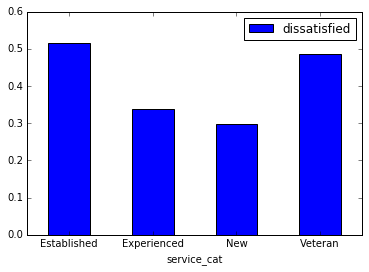

In [65]:
# Since we have more False than True, we can fill the NaN values with False to allow us to aggregate the data
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

emp_diss = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

emp_diss.plot(kind = 'bar', rot = 0)
plt.show()

## Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [66]:
combined_updated['age'] = (combined_updated['age']
                           .astype('str')
                           .str.replace(' or older', '')
                           .str.replace(' or younger', '')
                           .str.split()
                           .str[0]
                           .str.split('-')
                           .str[0]
                           .astype(float)
                          )
# Since youngest is 21 and oldest is 61, the middle would be 41, so anyone under 40 is young, anyone over 40 is older
def age_calc(val):
    if pd.isnull(val):
        return np.nan
    elif 21 <= val <= 41:
        return 'Young'
    elif val > 41:
        return 'Older'
    
combined_updated['young_old']= combined_updated['age'].apply(age_calc)
combined_updated['young_old'].value_counts(dropna = False)

Young    355
Older    230
NaN       65
Name: young_old, dtype: int64

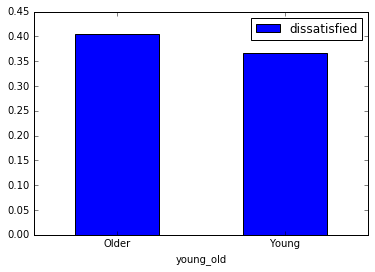

In [67]:
age_diss = combined_updated.pivot_table(values='dissatisfied', index='young_old')

age_diss.plot(kind = 'bar', rot = 0)
plt.show()

# Conclusion
1. On average, established and veteran employees tend to resign due to job dissatisfaction more than New and Experiences employees. This could be due to the fact that they have other options unlike New employees who may not have as many opportunities to change their job. 
2. On averge, older employees tend to resign due to job dissatisfaction more than young employees. This could be due to the fact that they have more experience and thus more options unlike New employees who may not have as many opportunities to change their job because they're young and without much experience.